# 觀察資料分布
* YELP
    * 50 review above 
    * join business, check-in and tips

# Import

In [1]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# 導入資料
train_df = pd.read_pickle('/home/adam/Steph_C/my_thesis/data/Train_by_postoal_code_without_review_pointwise_v3_3.pkl')
test_df = pd.read_pickle('/home/adam/Steph_C/my_thesis/data/Test_by_postoal_code_without_review_pointwise_v3_3.pkl')
all_df = pd.read_pickle('../Data/yelp/restaurant_only.pkl')

In [3]:
train_df.shape , test_df.shape

((5984, 27), (3160, 27))

In [5]:
train_df.relevance

1    11.0
0     8.0
3     7.0
2    10.0
0     0.0
     ... 
0     0.0
0     0.0
0     0.0
0     0.0
0     0.0
Name: relevance, Length: 5984, dtype: float64

# EDA

## 計算正負樣本比例

In [6]:
def cal_pos_neg(df):
    
    pos_neg_dict = {}
    
    for i in Counter(df.name):
        tmp = df[df.name == i]
        pos = tmp[tmp.relevance !=0]
        neg = tmp[tmp.relevance ==0]
        pos_neg_dict[i]={}
        pos_neg_dict[i]['pos_cnt'] = len(pos)
        pos_neg_dict[i]['neg_cnt'] = len(neg)
        
    return pos_neg_dict

In [7]:
train_pos_neg_dict = cal_pos_neg(train_df)
test_pos_neg_dict = cal_pos_neg(test_df)

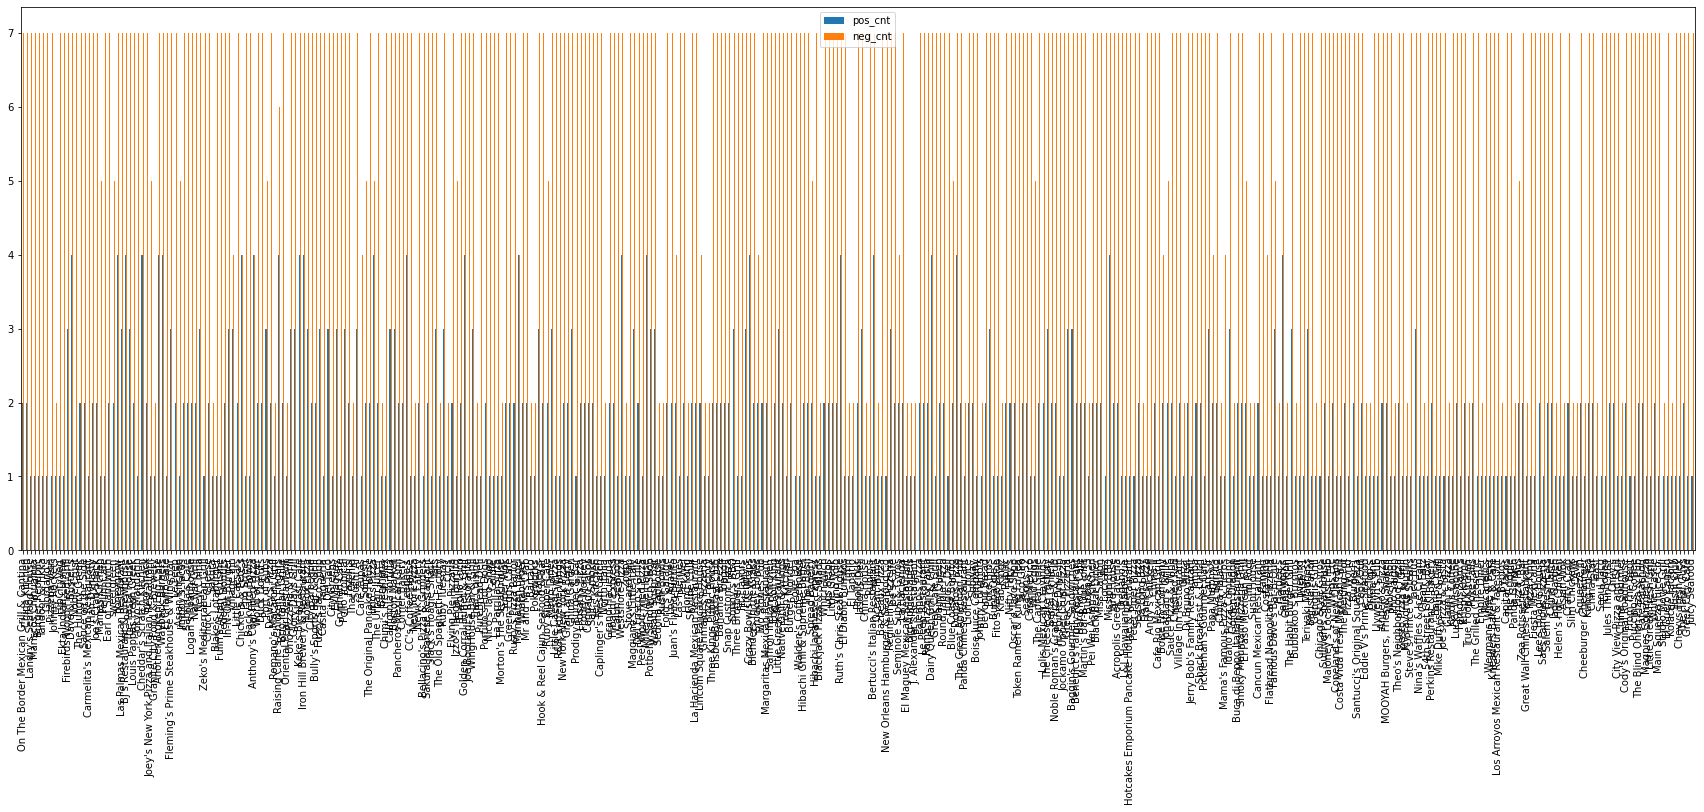

In [17]:
plt.rcParams['figure.figsize'] = [30, 10]

# pd.DataFrame(train_pos_neg_dict).T.plot.bar()
pd.DataFrame(test_pos_neg_dict).T.plot.bar()

plt.show()

## 計算距離

In [20]:
def cal_distance(df):
    
    dist_dict = {}
    
    for i in Counter(df.name):
        tmp = df[df.name == i]
        max_dist = max(tmp.postal_code.astype(int))
        min_dist = min(tmp.postal_code.astype(int))
        dist_dict[i] = max_dist-min_dist
        
    return dist_dict

In [21]:
train_dist_dict = cal_distance(train_df)
test_dist_dict = cal_distance(test_df)

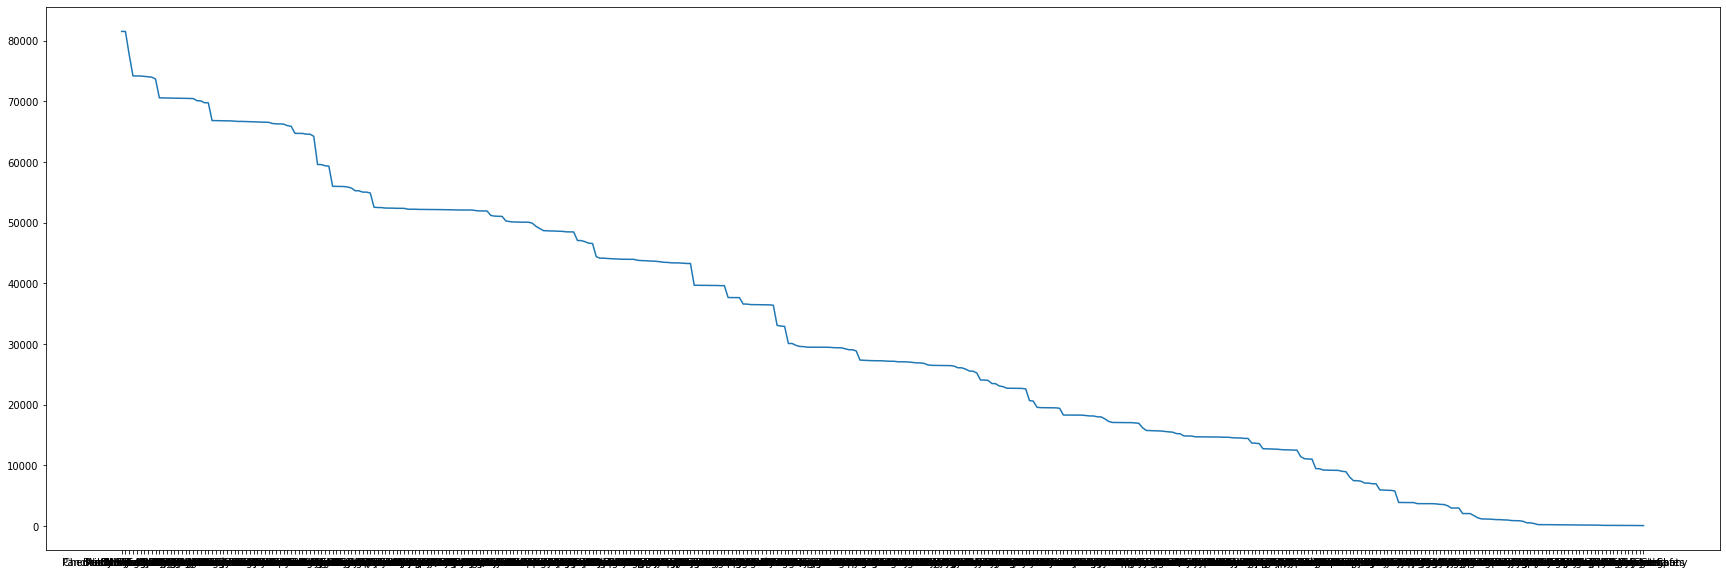

In [33]:
plt.rcParams['figure.figsize'] = [30, 10]
d = train_dist_dict
# d = test_dist_dict
lists = sorted(d.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [34]:
def get_dist_cnt(dict_):
    
    grouped_dist = {}
    
    grouped_dist['0_1000']=0
    grouped_dist['1000_5000']=0
    grouped_dist['5000_10000']=0
    grouped_dist['10000_30000']=0
    grouped_dist['30000_60000']=0
    grouped_dist['60000_']=0
    
    for k ,v in dict_.items():
        if v < 1000:
            grouped_dist['0_1000']+=1
        elif v>=1000 and v < 5000:
            grouped_dist['1000_5000']+=1
        elif v>=5000 and v < 10000:
            grouped_dist['5000_10000']+=1
        elif v>=10000 and v < 30000:
            grouped_dist['10000_30000']+=1
        elif v>=30000 and v < 60000:
            grouped_dist['30000_60000']+=1
        else:
            grouped_dist['60000_']+=1  
    return grouped_dist

In [35]:
train_grouped_dist = get_dist_cnt(train_dist_dict)
v = get_dist_cnt(test_dist_dict)

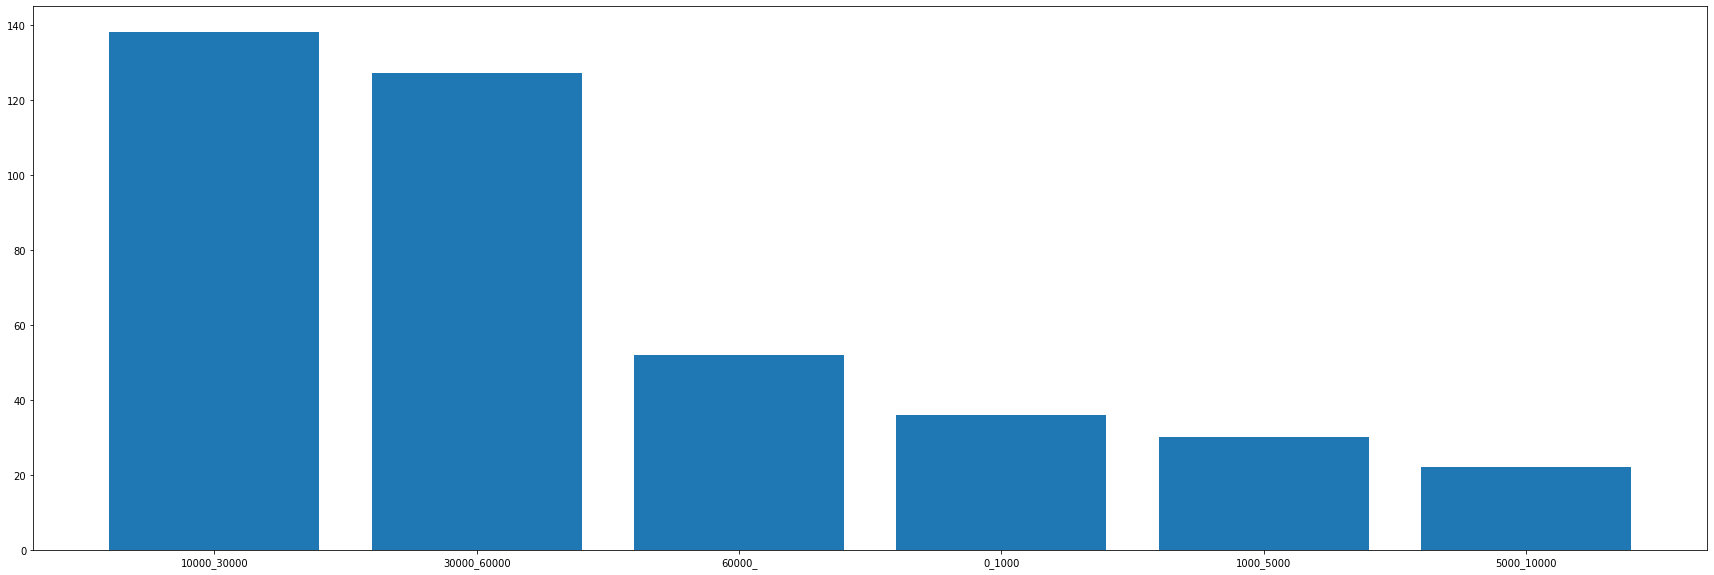

In [41]:
plt.rcParams['figure.figsize'] = [30, 10]
d = train_grouped_dist
# d = test_dist_dict
lists = sorted(d.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

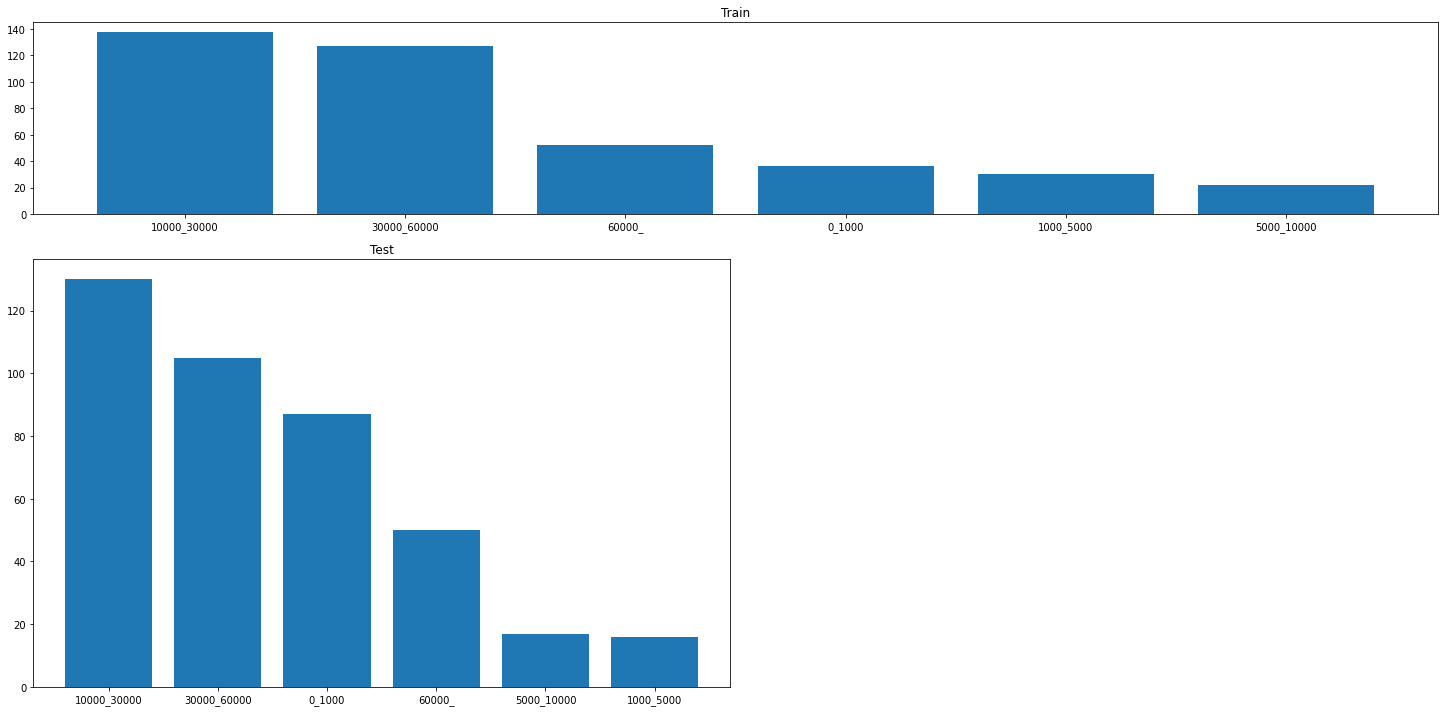

In [45]:
# Importing libraries
import math

# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)



# Plot for exponent
lists_train = sorted(train_grouped_dist.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples
x_train, y_train = zip(*lists_train) # unpack a list of pairs into two tuples
plot1.bar(x_train, y_train)
plot1.set_title('Train')

# Plot for Square
lists_test = sorted(test_grouped_dist.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples
x_test, y_test = zip(*lists_test) # unpack a list of pairs into two tuples
plot2.bar(x_test, y_test)
plot2.set_title('Test')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()
